# 1) Подготовливаем данные и импортируем бибилиотеки


In [177]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [95]:
def set_size():
    plt.figure(figsize=(10,5))

In [9]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 2) Исследуем данные

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 3) Исследуем данные с помощью графиков

Процент выживших женщин: 74.2
Процент выживших мужчин: 18.9


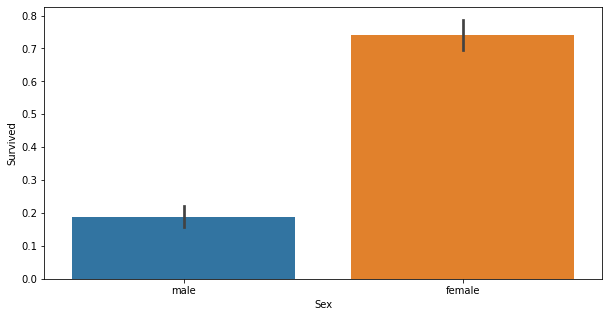

In [96]:
set_size()
sns.barplot(data=train_df, x='Sex', y='Survived')
print('Процент выживших женщин:', round(train_df['Survived'][train_df['Sex'] == 'female'].value_counts(normalize=True)
[1]*100, 1))
print('Процент выживших мужчин:', round(train_df['Survived'][train_df['Sex'] == 'male'].value_counts(normalize=True)
[1]*100, 1))



<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

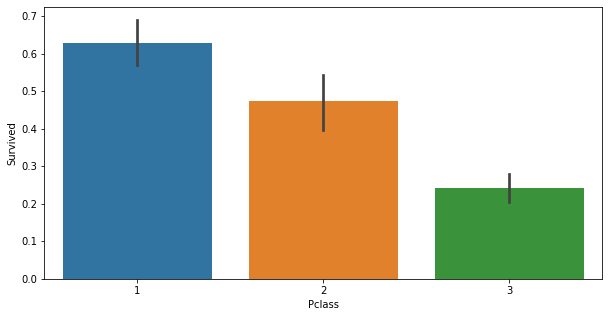

In [97]:
set_size()
sns.barplot(data = train_df, x='Pclass', y='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

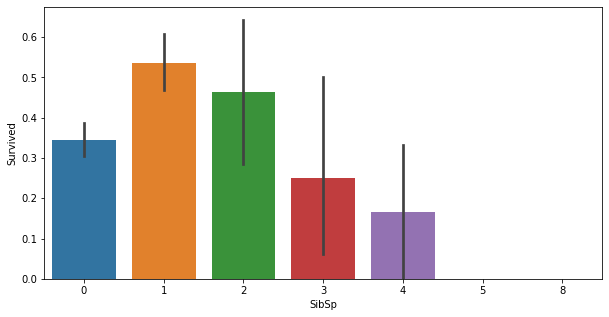

In [98]:
set_size()
sns.barplot(data = train_df, x='SibSp', y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

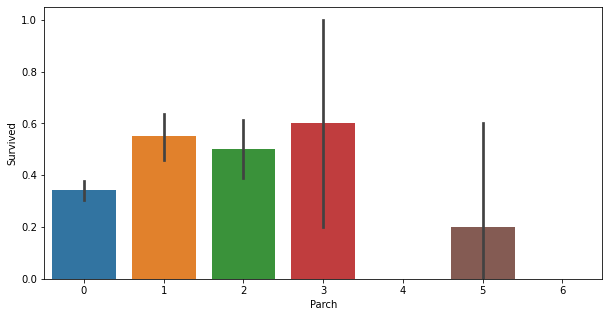

In [99]:
set_size()
sns.barplot(data = train_df, x='Parch', y='Survived')

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

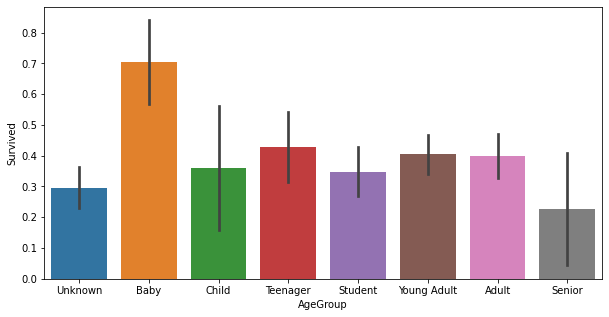

In [101]:
set_size()
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels) 
# Певрое - откуда берем данные, второе - на какие бины разбиваем, третье - как называем 
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)
sns.barplot(data=train_df, x="AgeGroup", y="Survived")


        
        

<AxesSubplot:xlabel='CabinBool', ylabel='Survived'>

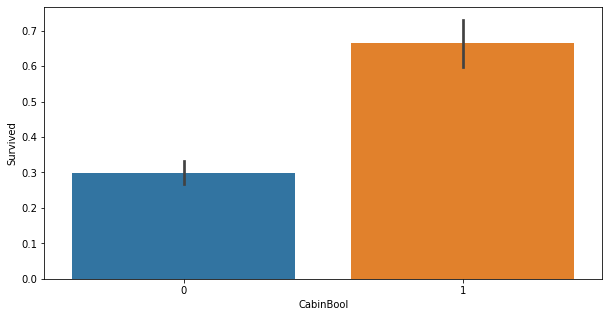

In [108]:
train_df['CabinBool'] = train_df['Cabin'].notnull().astype('int64')
test_df['CabinBool'] = test_df['Cabin'].notnull().astype('int64')
set_size()
sns.barplot(data = train_df, x='CabinBool', y='Survived')

# 4) Чистим данные

In [116]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [129]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,889,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,8,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,NaN,S,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,NaN,644,220,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,32.204208,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,49.693429,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,7.910400,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,14.454200,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,0.000000


In [119]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
CabinBool        0
dtype: int64

In [130]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
AgeGroup       0
CabinBool      0
dtype: int64

In [136]:
train_df = train_df.fillna({'Embarked':'S'}) # В train не осталось нулей

In [ ]:
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

In [123]:
train_df = train_df.drop('Ticket', axis=1)
test_df = test_df.drop('Ticket', axis=1)

In [ ]:
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

In [153]:
train_df = train_df.drop('Fare', axis=1)
test_df = test_df.drop('Fare', axis=1)

In [139]:
train_df['Sex'] = train_df['Sex'].replace('male', 0)
train_df['Sex'] = train_df['Sex'].replace('female', 1)
test_df['Sex'] = test_df['Sex'].replace('male', 0)
test_df['Sex'] = test_df['Sex'].replace('female', 1)

In [143]:
train_df['Embarked'] = train_df['Embarked'].replace('S', 1)
train_df['Embarked'] = train_df['Embarked'].replace('C', 2)
train_df['Embarked'] = train_df['Embarked'].replace('Q', 3)
test_df['Embarked'] = test_df['Embarked'].replace('S', 1)
test_df['Embarked'] = test_df['Embarked'].replace('C', 2)
test_df['Embarked'] = test_df['Embarked'].replace('Q', 3)

In [ ]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels) 
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels) 

In [162]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,CabinBool
0,1,0,3,0,22.0,1,0,1,5,0
1,2,1,1,1,38.0,1,0,2,7,1
2,3,1,3,1,26.0,0,0,1,6,0
3,4,1,1,1,35.0,1,0,1,6,1
4,5,0,3,0,35.0,0,0,1,6,0


In [163]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,CabinBool
0,892,3,0,34.5,0,0,3,6,0
1,893,3,1,47.0,1,0,1,7,0
2,894,2,0,62.0,0,0,3,8,0
3,895,3,0,27.0,0,0,1,6,0
4,896,3,1,22.0,1,1,1,5,0


# 5) Обучаем модель

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [264]:
target = train_df['Survived']
predictors = train_df.drop(['Survived', 'PassengerId'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=0)

In [265]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
score_lg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(score_lg)

80.97


In [266]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
score_dt = round(accuracy_score(y_pred, y_test) * 100, 2)
print(score_dt)

76.49


In [267]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
score_rf = round(accuracy_score(y_pred, y_test) * 100, 2)
print(score_rf)

77.99


In [268]:
models = pd.DataFrame({'Модель': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier'],
                      'Счет(в процентах)': [score_lg, score_dt, score_rf]})

In [273]:
models.sort_values(by='Счет(в процентах)', ascending=False)

,Модель,Счет(в процентах)
0,LogisticRegression,80.97
2,RandomForestClassifier,77.99
1,DecisionTreeClassifier,76.49
